<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Stats-analytics/blob/main/Day_2_Python_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team Members

load data

In [34]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(io.BytesIO(uploaded[fn]))

print(df.head())


Saving Whatsapp_chat.csv to Whatsapp_chat (4).csv
User uploaded file "Whatsapp_chat (4).csv" with length 1819920 bytes
   Unnamed: 0  hours  days months    names   timestamp
0           0      1    19    May  Person4  2020-05-19
1           1     22    19    May  Person3  2020-05-19
2           2     22    19    May  Person3  2020-05-19
3           3     22    19    May  Person1  2020-05-19
4           4     22    19    May  Person3  2020-05-19


describe data

In [35]:
df.describe()

,Unnamed: 0,hours,days
count,51575.000000,51575.000000,51575.000000
mean,25787.000000,12.041551,14.571905
std,14888.564404,8.152448,9.553132
min,0.000000,0.000000,1.000000
25%,12893.500000,2.000000,7.000000
50%,25787.000000,14.000000,12.000000
75%,38680.500000,19.000000,24.000000
max,51574.000000,23.000000,31.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51575 entries, 0 to 51574
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  51575 non-null  int64 
 1   hours       51575 non-null  int64 
 2   days        51575 non-null  int64 
 3   months      51575 non-null  object
 4   names       51575 non-null  object
 5   timestamp   51575 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.4+ MB


checking missing values

In [37]:
df.isnull().sum()

,0
Unnamed: 0,0
hours,0
days,0
months,0
names,0
timestamp,0


clean data

In [38]:

month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
# Convert month names to numbers using the mapping
if 'months' in df.columns:
    df['months'] = df['months'].map(month_mapping)

    #Handle potential errors where month name is not in the dictionary
    df['months'] = df['months'].fillna(-1) # or some other default value

    #Convert to int
    df['months'] = df['months'].astype(int)

# rename Unnamed0 to ID
df = df.rename(columns={'Unnamed: 0': 'ID'})
print(df.head())


   ID  hours  days  months    names   timestamp
0   0      1    19       5  Person4  2020-05-19
1   1     22    19       5  Person3  2020-05-19
2   2     22    19       5  Person3  2020-05-19
3   3     22    19       5  Person1  2020-05-19
4   4     22    19       5  Person3  2020-05-19


visualizing correlations


<Axes: >

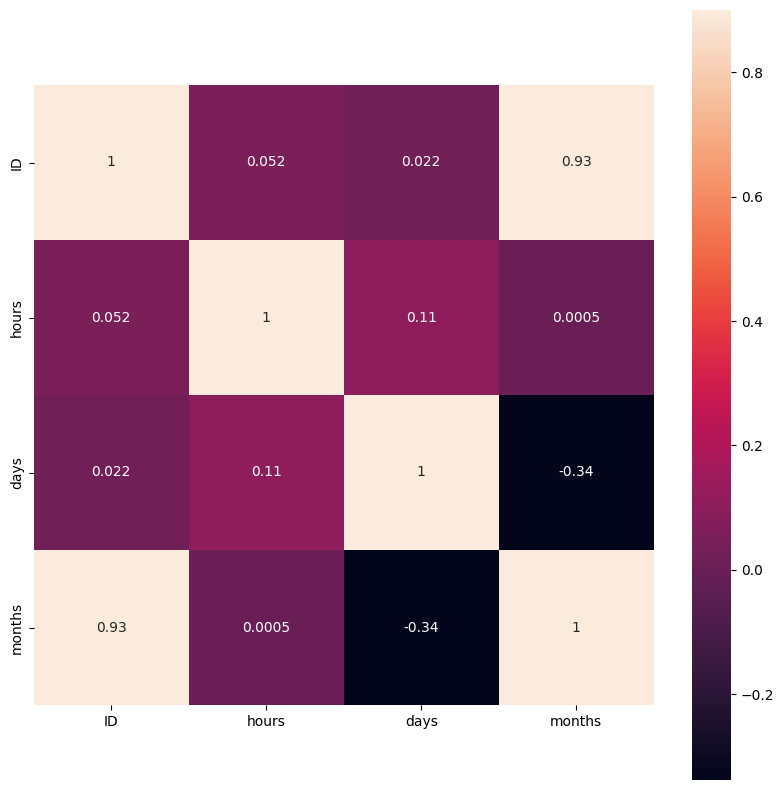

In [39]:
# visualizing correlations
corrmat = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=0.9, square = True, annot=True, ax = ax)

Outliers Detection

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outliers Detection
def find_outliers_IQR(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in ['months', 'hours','days']:
  outliers = find_outliers_IQR(df, col)
  print(outliers)



Empty DataFrame
Columns: [ID, hours, days, months, names, timestamp]
Index: []
Empty DataFrame
Columns: [ID, hours, days, months, names, timestamp]
Index: []
Empty DataFrame
Columns: [ID, hours, days, months, names, timestamp]
Index: []


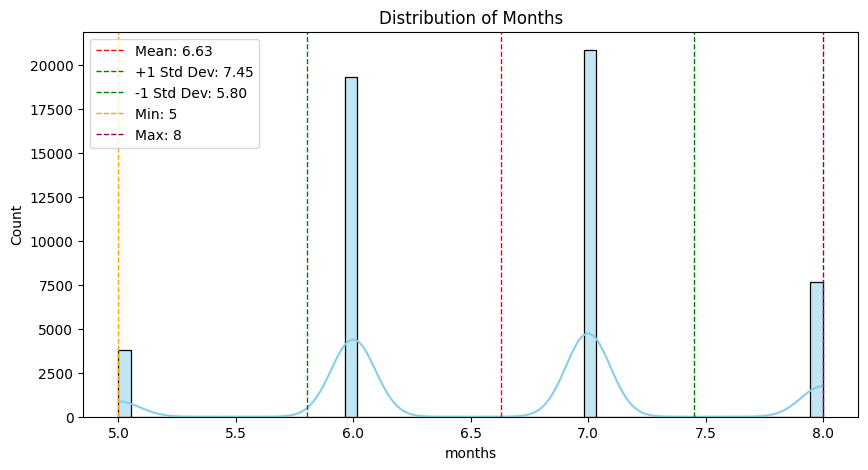

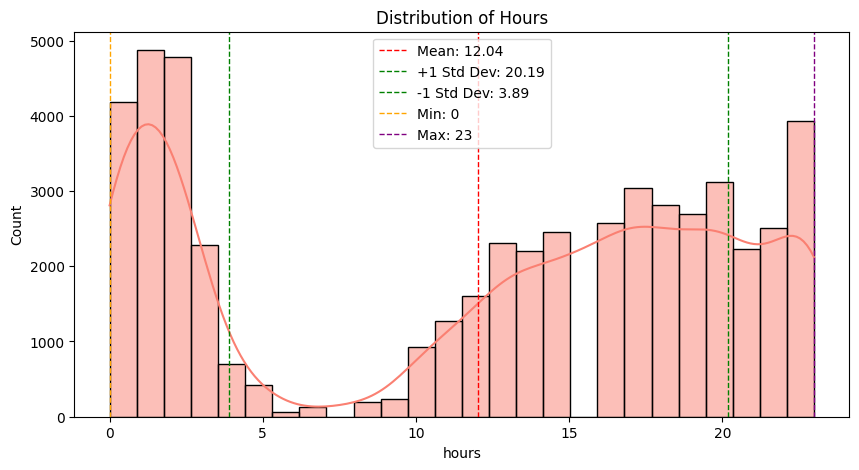

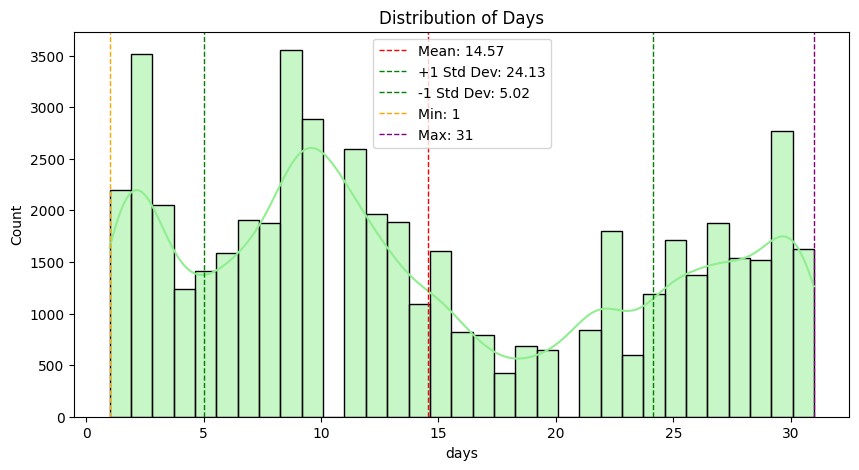

In [44]:
plt.figure(figsize=(10, 5))

# Plot for 'months'
sns.histplot(df['months'], kde=True, color='skyblue')
plt.title('Distribution of Months')
plt.axvline(df['months'].mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {df['months'].mean():.2f}")
plt.axvline(df['months'].mean() + df['months'].std(), color='green', linestyle='dashed', linewidth=1, label=f"+1 Std Dev: {df['months'].mean() + df['months'].std():.2f}")
plt.axvline(df['months'].mean() - df['months'].std(), color='green', linestyle='dashed', linewidth=1, label=f"-1 Std Dev: {df['months'].mean() - df['months'].std():.2f}")
plt.axvline(df['months'].min(), color='orange', linestyle='dashed', linewidth=1, label=f"Min: {df['months'].min()}")
plt.axvline(df['months'].max(), color='purple', linestyle='dashed', linewidth=1, label=f"Max: {df['months'].max()}")
plt.legend()
plt.show()


plt.figure(figsize=(10, 5)) # Increased figure size

# Plot for 'hours'
sns.histplot(df['hours'], kde=True, color='salmon')
plt.title('Distribution of Hours')
plt.axvline(df['hours'].mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {df['hours'].mean():.2f}")
plt.axvline(df['hours'].mean() + df['hours'].std(), color='green', linestyle='dashed', linewidth=1, label=f"+1 Std Dev: {df['hours'].mean() + df['hours'].std():.2f}")
plt.axvline(df['hours'].mean() - df['hours'].std(), color='green', linestyle='dashed', linewidth=1, label=f"-1 Std Dev: {df['hours'].mean() - df['hours'].std():.2f}")
plt.axvline(df['hours'].min(), color='orange', linestyle='dashed', linewidth=1, label=f"Min: {df['hours'].min()}")
plt.axvline(df['hours'].max(), color='purple', linestyle='dashed', linewidth=1, label=f"Max: {df['hours'].max()}")
plt.legend()
plt.show()


plt.figure(figsize=(10, 5)) # Increased figure size

# Plot for 'days'
sns.histplot(df['days'], kde=True, color='lightgreen')
plt.title('Distribution of Days')
plt.axvline(df['days'].mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {df['days'].mean():.2f}")
plt.axvline(df['days'].mean() + df['days'].std(), color='green', linestyle='dashed', linewidth=1, label=f"+1 Std Dev: {df['days'].mean() + df['days'].std():.2f}")
plt.axvline(df['days'].mean() - df['days'].std(), color='green', linestyle='dashed', linewidth=1, label=f"-1 Std Dev: {df['days'].mean() - df['days'].std():.2f}")
plt.axvline(df['days'].min(), color='orange', linestyle='dashed', linewidth=1, label=f"Min: {df['days'].min()}")
plt.axvline(df['days'].max(), color='purple', linestyle='dashed', linewidth=1, label=f"Max: {df['days'].max()}")
plt.legend()
plt.show()
